# Resources Availability Knowledge 


In [1]:
#Dependencies and Set up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#File to Load 
mentalhealth_data_to_load= "Resources/survey.csv"

#Read in Survey Data 
mentalhealth_data= pd.read_csv(mentalhealth_data_to_load)

mental_health_df= pd.DataFrame(mentalhealth_data)

mental_health_df.head()




,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
mental_health_df_rename = mental_health_df.rename(columns={"family_history": "Family History",
                                                            "work_interfere": "Mental Illness Interfere",
                                                            "treatment": "Seeking Treatment",
                                                            "obs_consequence": "Heard/Observed Consequences",
                                                            "wellness_program": "Employee Wellness Program",
                                                            "benefits" : "Employer Benefits",
                                                            "seek_help": "Employer Provide Resources",
                                                            "care_options": "Knowledge of Options", 
                                                            "tech_company": "Work in Tech",
                                                            "state": "State"})

mental_health_df_rename

,Timestamp,Age,Gender,Country,State,self_employed,Family History,Seeking Treatment,Mental Illness Interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,Heard/Observed Consequences,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
#Find tech only workers 
techcompany= mental_health_df_rename['Work in Tech'].value_counts()

techcompany




Yes    1031
No      228
Name: Work in Tech, dtype: int64

In [4]:
tech_df = mental_health_df_rename.loc[(mental_health_df_rename['Work in Tech'] =='Yes')]

tech_df




,Timestamp,Age,Gender,Country,State,self_employed,Family History,Seeking Treatment,Mental Illness Interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,Heard/Observed Consequences,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,8/27/2014 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,25-Jun,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,8/20/2015 16:52,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN


In [5]:
#Create a DataFrame with gender,benefits, wellnessprogram and ability seek out help knowledge 

worker_output= pd.DataFrame(tech_df, columns=["Age","Employer Benefits",
                                             "Employee Wellness Program"])


worker_output


,Age,Employer Benefits,Employee Wellness Program
0,37,Yes,No
2,32,No,No
3,31,No,No
4,31,Yes,Don't know
5,33,Yes,No
...,...,...,...
1252,29,Yes,Yes
1254,26,No,No
1255,32,Yes,No
1256,34,Yes,No


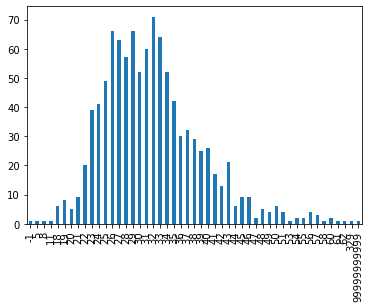

In [6]:
worker_output["Age"].value_counts().sort_index().plot(kind="bar")

(1025, 3)


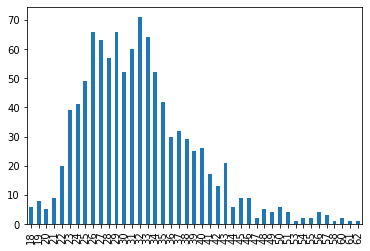

In [7]:
worker_output=worker_output[(worker_output["Age"]>= 18) & (worker_output["Age"]<= 72)].copy()
print(worker_output.shape)
worker_output["Age"].value_counts().sort_index().plot(kind="bar")

In [8]:
#Bins for Bar Charts for benefits, wellness program, seek help 
bins = [0, 25, 30, 40, 72]
labels = ["Entry Level","Early/Mid Career","Mid Career", "Late Career"]
worker_output['Age Category'] = pd.cut(worker_output['Age'], bins=bins, labels=labels)
worker_output['Age Category'].value_counts()


Mid Career          431
Early/Mid Career    304
Entry Level         177
Late Career         113
Name: Age Category, dtype: int64

In [9]:
#Early career
worker_output_ec= worker_output[worker_output["Age Category"]=="Entry Level"].copy ()


In [10]:
#Early Career 
ec_b = worker_output_ec['Employer Benefits'].value_counts()
ec_wellness = worker_output_ec['Employee Wellness Program'].value_counts()




In [11]:
#Early Career Data Frame 
ec_df= pd.DataFrame({"Employer Benefits": ec_b,
"Employee Wellness Program": ec_wellness 
})


           



ec_df

,Employer Benefits,Employee Wellness Program
Don't know,79,39
No,46,112
Yes,52,26


In [12]:
ec_df.loc["No"] = ec_df.loc["Don't know"] + ec_df.loc["No"]
ec_df = ec_df.drop("Don't know")

ec_df

,Employer Benefits,Employee Wellness Program
No,125,151
Yes,52,26


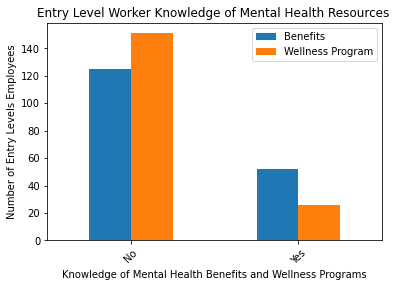

In [13]:
#Early Career Bargraph 
ec_df.plot(kind='bar')
plt.xticks(rotation=45)




plt.xlabel('Knowledge of Mental Health Benefits and Wellness Programs')
plt.ylabel('Number of Entry Levels Employees')
plt.title('Entry Level Worker Knowledge of Mental Health Resources ')
plt.legend(["Benefits", "Wellness Program"])


In [14]:
#Need early mid  data frame by age category 
worker_output_emid= worker_output[worker_output["Age Category"]=="Early/Mid Career"].copy ()

worker_output_emid

,Age,Employer Benefits,Employee Wellness Program,Age Category
11,29,Don't know,No,Early/Mid Career
14,27,Don't know,Don't know,Early/Mid Career
15,29,Yes,No,Early/Mid Career
20,29,Yes,No,Early/Mid Career
32,30,Don't know,No,Early/Mid Career
...,...,...,...,...
1242,28,Don't know,No,Early/Mid Career
1249,30,Yes,Don't know,Early/Mid Career
1250,30,Yes,Yes,Early/Mid Career
1252,29,Yes,Yes,Early/Mid Career


In [15]:
#need early mid survey results 
emid_b = worker_output_emid["Employer Benefits"].value_counts()
emid_wellness = worker_output_emid['Employee Wellness Program'].value_counts()


In [16]:
#Early/Mid data frame with survey results 

emid_df= pd.DataFrame({"Employer Benefits": emid_b,
"Employee Wellness Program": emid_wellness, 
})

emid_df

,Employer Benefits,Employee Wellness Program
No,107,223
Don't know,100,45
Yes,97,36


In [17]:
emid_df.loc["No"] = emid_df.loc["Don't know"] + emid_df.loc["No"]
emid_df = emid_df.drop("Don't know")

emid_df

,Employer Benefits,Employee Wellness Program
No,207,268
Yes,97,36


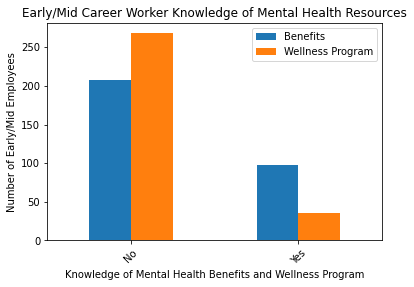

In [18]:
#Early/Mid Available resources data bargraph 
emid_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Benefits and Wellness Program')
plt.ylabel('Number of Early/Mid Employees')
plt.title('Early/Mid Career Worker Knowledge of Mental Health Resources')
plt.legend(["Benefits", "Wellness Program"])

In [19]:
# Mid Career  create data frame 
worker_output_mid= worker_output[worker_output["Age Category"]=="Mid Career"].copy ()

worker_output_mid

,Age,Employer Benefits,Employee Wellness Program,Age Category
0,37,Yes,No,Mid Career
2,32,No,No,Mid Career
3,31,No,No,Mid Career
4,31,Yes,Don't know,Mid Career
5,33,Yes,No,Mid Career
...,...,...,...,...
1241,31,No,No,Mid Career
1246,32,Yes,Don't know,Mid Career
1247,36,No,No,Mid Career
1255,32,Yes,No,Mid Career


In [20]:
#value counts for responses on survey

mid_b = worker_output_mid["Employer Benefits"].value_counts()
mid_wellness = worker_output_mid['Employee Wellness Program'].value_counts()


In [21]:
#mid career data frame 

mid_df= pd.DataFrame({"Employer Benefits": mid_b,
"Employee Wellness Program": mid_wellness, 
})

mid_df

,Employer Benefits,Employee Wellness Program
Don't know,123,63
No,145,298
Yes,163,70


In [22]:
mid_df.loc["No"] = mid_df.loc["Don't know"] + mid_df.loc["No"]
mid_df = mid_df.drop("Don't know")

mid_df

,Employer Benefits,Employee Wellness Program
No,268,361
Yes,163,70


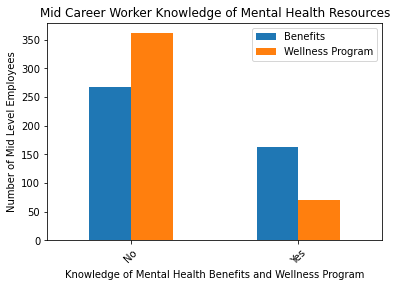

In [23]:
#barchart for mid 
mid_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Benefits and Wellness Program')
plt.ylabel('Number of Mid Level Employees')
plt.title('Mid Career Worker Knowledge of Mental Health Resources')

plt.legend(["Benefits", "Wellness Program"])


In [24]:
#late career by age and knowledge of resources 
worker_output_late= worker_output[worker_output["Age Category"]=="Late Career"].copy ()

worker_output_late

,Age,Employer Benefits,Employee Wellness Program,Age Category
8,42,Yes,No,Late Career
18,46,Yes,Yes,Late Career
22,46,Yes,No,Late Career
33,42,Yes,Yes,Late Career
38,50,Yes,No,Late Career
...,...,...,...,...
1222,41,Don't know,Don't know,Late Career
1236,60,Don't know,Yes,Late Career
1243,43,Yes,No,Late Career
1248,41,Yes,No,Late Career


In [25]:
#value counts for responses on survey for late career 

late_b = worker_output_late["Employer Benefits"].value_counts()
late_wellness = worker_output_late['Employee Wellness Program'].value_counts()


In [26]:
#Late career data frame 
late_df= pd.DataFrame({"Employer Benefits": late_b,
"Employee Wellness Program": late_wellness, 
})

late_df

,Employer Benefits,Employee Wellness Program
Don't know,32,14
No,23,71
Yes,58,28


In [27]:
late_df.loc["No"] = late_df.loc["Don't know"] + late_df.loc["No"]
late_df = late_df.drop("Don't know")

late_df

,Employer Benefits,Employee Wellness Program
No,55,85
Yes,58,28


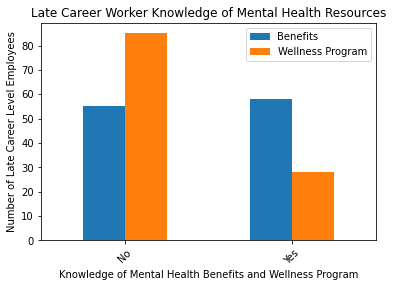

In [28]:
#barchart for late
late_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Benefits and Wellness Program')
plt.ylabel('Number of Late Career Level Employees')
plt.title('Late Career Worker Knowledge of Mental Health Resources')

plt.legend(["Benefits", "Wellness Program"])